In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
import processors
import matplotlib.pyplot as plt

In [35]:
raw_covid_df = processors.load_data("../data/us-counties.csv")

In [36]:
by_date_state_df = processors.aggregate_covid_cases_by_group(None, ["date", "state"], raw_covid_df, "cases")

In [68]:
by_date_state_df

date          state   cases                          
                                     sum         mean  min     max
0      2020-01-21     Washington       1     1.000000    1       1
1      2020-01-22     Washington       1     1.000000    1       1
2      2020-01-23     Washington       1     1.000000    1       1
3      2020-01-24       Illinois       1     1.000000    1       1
4      2020-01-24     Washington       1     1.000000    1       1
...           ...            ...     ...          ...  ...     ...
19644  2021-02-22       Virginia  565270  4250.150376   90   65317
19645  2021-02-22     Washington  338309  8674.589744   85   83073
19646  2021-02-22  West Virginia  129854  2360.981818  222   11891
19647  2021-02-22      Wisconsin  612713  8509.902778  466  106397
19648  2021-02-22        Wyoming   53900  2343.478261  148    8135

[19649 rows x 6 columns]

In [37]:
nh_data = by_date_state_df[by_date_state_df["state"] == "New Hampshire"]

In [40]:
nh_data["new_cases"] = nh_data["cases","sum"] - nh_data["cases","sum"].shift(1)

<ipython-input-40-1e8b38e833bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nh_data["new_cases"] = nh_data["cases","sum"] - nh_data["cases","sum"].shift(1)


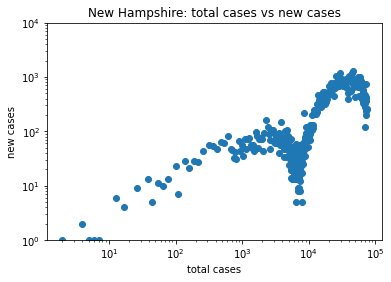

In [52]:
plt.figure(1)
plt.scatter(nh_data["cases","sum"], nh_data["new_cases"])
plt.yscale("log")
plt.xscale("log")
plt.ylim((1,1e4))
plt.xlabel("total cases")
plt.ylabel("new cases")
plt.title("New Hampshire: total cases vs new cases")
plt.show()

In [53]:
nh_raw_df = raw_covid_df[raw_covid_df["state"] == "New Hampshire"]

In [55]:
nh_by_county = processors.aggregate_covid_cases_by_group(None, ["county"], nh_raw_df, "cases")

In [60]:
nh_by_county

county    cases                        
                      sum         mean min    max
0        Belknap   215867   631.190058   2   3056
1        Carroll   116259   337.962209   1   1653
2       Cheshire   168109   494.438235   1   2568
3           Coos    79082   242.582822   1   1280
4        Grafton   157143   438.946927   1   2496
5   Hillsborough  2584248  7490.573913   1  28018
6      Merrimack   572335  1673.494152   1   7316
7     Rockingham  1483014  4201.172805   1  18072
8      Strafford   467241  1378.292035   1   6836
9       Sullivan    73930   218.727811   1   1305
10       Unknown    80227   276.644828   0   1132

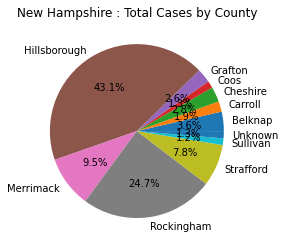

In [65]:
plt.figure(2)
plt.pie(nh_by_county["cases"]["sum"], labels=nh_by_county["county"], autopct="%1.1f%%")
plt.title("New Hampshire : Total Cases by County")
plt.show()

In [69]:
state_total_df = processors.aggregate_covid_cases_by_group(None, ["state"], raw_covid_df, "cases")

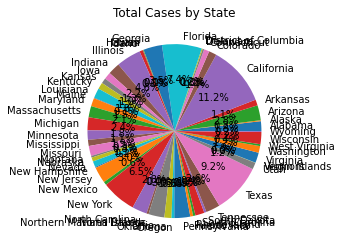

In [70]:
plt.figure(3)
plt.pie(state_total_df["cases"]["sum"], labels=state_total_df["state"], autopct="%1.1f%%")
plt.title("Total Cases by State")
plt.show()